# Diagnosing Coronary Artery Disease 


**Data Set Information:**

This dataset contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

**Attribute Information:**

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## Import Libraries

In [20]:
import sys

# Data Science Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Machine Learning Tools
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

# Deep Learning Tools
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


## Loading data

In [2]:
# Import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeeak", "slope", "ca", "thal", "class"]

In [3]:
# read the csv
cleveland_data = pd.read_csv(url, names = names)

In [4]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# print the shape of the Dataframe, so we can see how many examples we have

print("Shape of Dataframe: {}".format(cleveland_data.shape))
print(cleveland_data.loc[1])

Shape of Dataframe: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeeak      1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [6]:
# print the lsat twenty or so data points
cleveland_data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


## Data Preparation

In [7]:
# remove missing data (indicated with a "?")
data = cleveland_data[~cleveland_data.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [8]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [9]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeeak    float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [10]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeeak    float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [11]:
# print data characteristics, usings pandas built-in describe() function
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


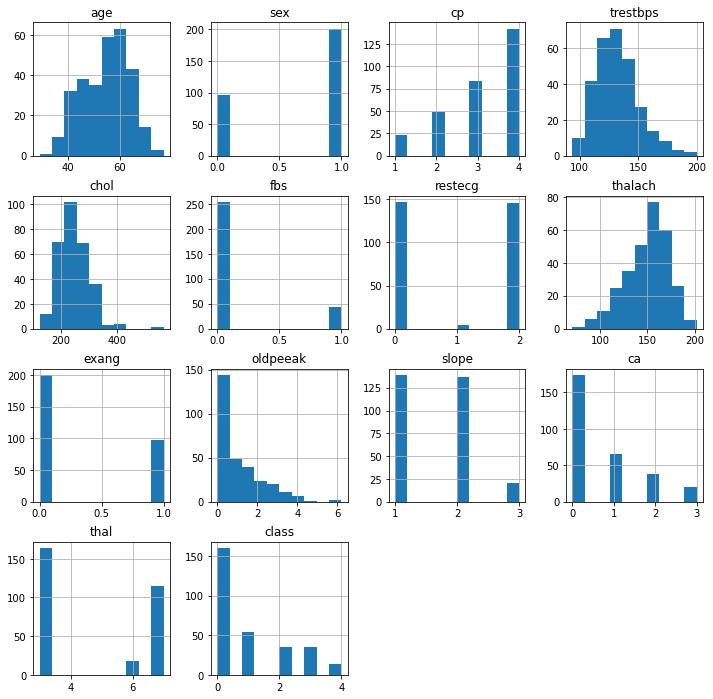

In [12]:
# plot histogram for each variables
data.hist(figsize=(12, 12))
plt.show()

## Data Splitting (Train / Test)

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

Furthermore, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0].

In [13]:
# create X and y datasets for training

X = np.array(data.drop(["class"],1))
y = np.array(data["class"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [14]:
# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes = None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


## Modelling

In [15]:
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 13, kernel_initializer = "normal", activation= "relu"))
    model.add(Dense(4, kernel_initializer= "normal", activation = "relu"))
    model.add(Dense(5, activation = "softmax"))

    # compile model
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 724us/step - loss: 1.6191 - accuracy: 0.3207
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 1.5890 - accuracy: 0.5527
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 1.5752 - accuracy: 0.5527
Epoch 4/100
24/24 [==============================] - 0s 650us/step - loss: 1.5619 - accuracy: 0.5527
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 1.5490 - accuracy: 0.5527
Epoch 6/100
24/24 [==============================] - 0s 650us/step - loss: 1.5364 - accuracy: 0.5527
Epoch 7/100
24/24 [==============================] - 0s 650us/step - loss: 1.5241 - accuracy: 0.5527
Epoch 8/100
24/24 [==============================] - 0s 694us/step - loss: 1.5124 - accuracy: 0.5527
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 1.5014 - accuracy: 0.5527
Epoch 10/100
24/24 [==============================] - 0s 694us/step - loss: 1.4905 - accura

In [17]:
# convert into binary classification problem  - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1]


In [18]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam, metrics=['accuracy'])
    return model


binary_model = create_binary_model()

print(binary_model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
24/24 [==============================] - 0s 694us/step - loss: 0.7095 - accuracy: 0.4810
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 0.6924 - accuracy: 0.5527
Epoch 3/100
24/24 [==============================] - 0s 650us/step - loss: 0.6922 - accuracy: 0.5527
Epoch 4/100
24/24 [==============================] - 0s 694us/step - loss: 0.6919 - accuracy: 0.5527
Epoch 5/100
24/24 [==============================] - 0s 737us/step - loss: 0.6916 - accuracy: 0.5527
Epoch 6/100
24/24 [==============================] - 0s 737us/step - loss: 0.6914 - accuracy: 0.5527
Epoch 7/100
24/24 [==============================] - 0s 737us/step - loss: 0.6911 - accuracy: 0.5527
Epoch 8/100
24/24 [==============================] - 0s 737us/step - loss: 0.6909 - accuracy: 0.5527
Epoch 9/100
24/24 [==============================] - 0s 737us/step - loss: 0.6906 - accuracy: 0.5527
Epoch 10/100
24/24 [==============================] - 0s 737us/step - loss: 0.6904 - accura

In [21]:
# generate classification report using predictions for categorical model

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))


Results for Categorical Model
0.48333333333333334
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        29
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.48        60
   macro avg       0.10      0.20      0.13        60
weighted avg       0.23      0.48      0.31        60



C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))


Results for Binary Model
0.48333333333333334
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        29
           1       0.00      0.00      0.00        31

    accuracy                           0.48        60
   macro avg       0.24      0.50      0.33        60
weighted avg       0.23      0.48      0.31        60



C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eda AYDIN\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
